In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
try:
    df = pd.read_csv('../data/heart_disease_selected_features.csv')
    print("Dataset with selected features loaded successfully.")
except FileNotFoundError:
    print("Error: 'heart_disease_selected_features.csv' not found.")
    print("Please run the feature selection script first to generate this file.")
    # As a fallback, create a dummy dataframe
    print("Creating a dummy dataframe for demonstration purposes.")
    data = {
        'feat1': np.random.rand(303), 'feat2': np.random.rand(303), 'feat3': np.random.rand(303),
        'feat4': np.random.rand(303), 'feat5': np.random.rand(303), 'feat6': np.random.rand(303),
        'feat7': np.random.rand(303), 'feat8': np.random.rand(303),
        'target': np.random.randint(0, 2, 303)
    }
    df = pd.DataFrame(data)

Dataset with selected features loaded successfully.


In [3]:
X = df.drop('target', axis=1)
# We keep the true labels to compare with our clustering results later.
y_true = (df['target'] > 0).astype(int)

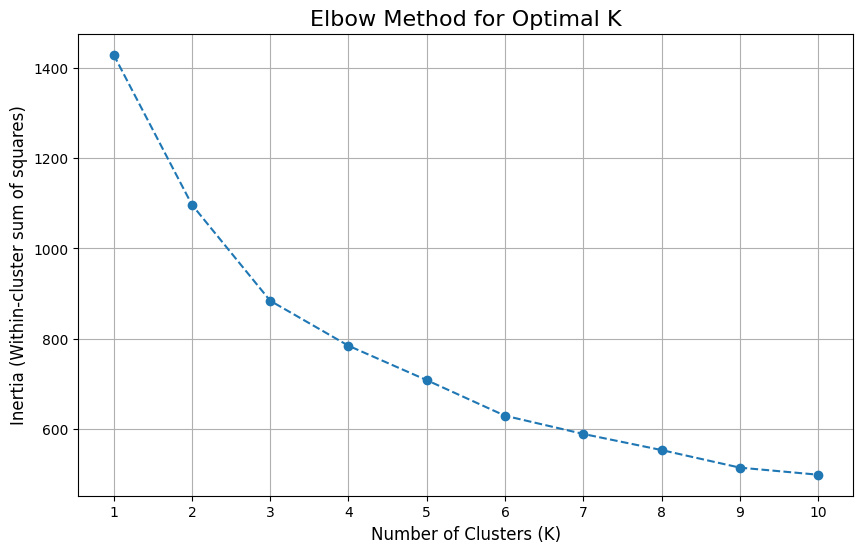

In [4]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [5]:
optimal_k = 2
print(f"Based on the Elbow Method, the optimal K is chosen to be {optimal_k}.")

Based on the Elbow Method, the optimal K is chosen to be 2.


In [10]:
print("\n--- Apply K-Means with the optimal K ---")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)


--- Apply K-Means with the optimal K ---


In [8]:
print("\n--- Applying Hierarchical Clustering ---")
linked = linkage(X, method='ward')


--- Applying Hierarchical Clustering ---


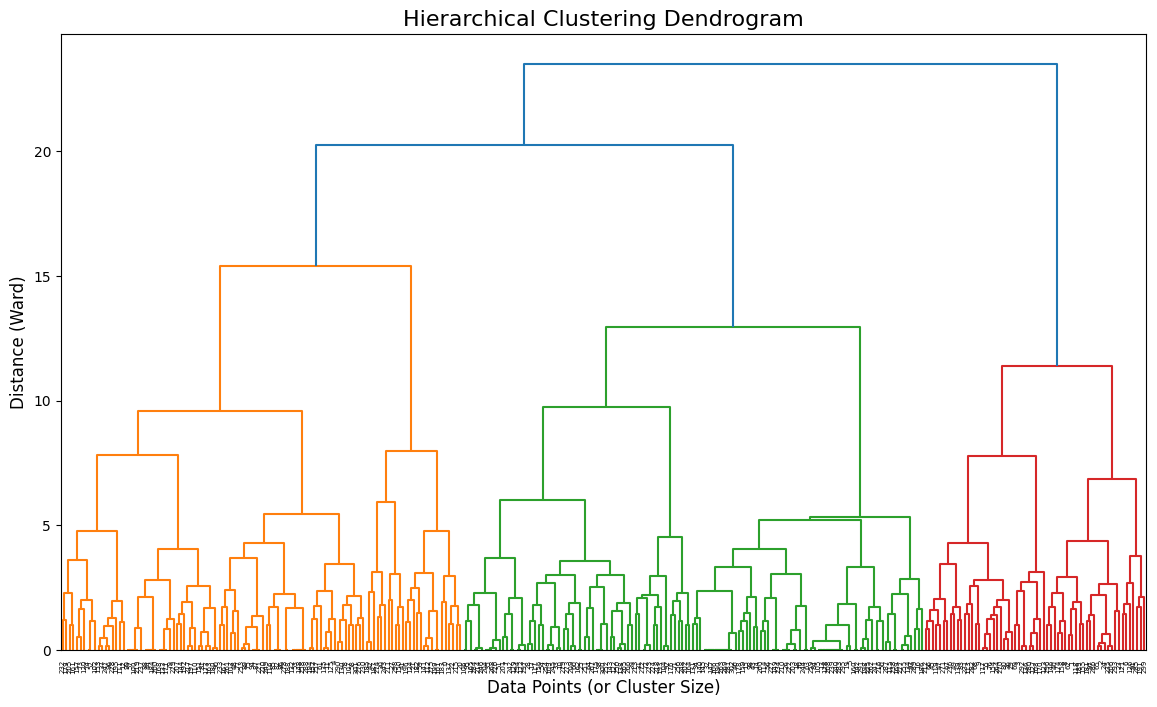

In [11]:
plt.figure(figsize=(14, 8))
dendrogram(linked,
           orientation='top',
           labels=None, # Not showing individual sample labels for clarity
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
plt.xlabel('Data Points (or Cluster Size)', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.show()

In [12]:
# Apply Agglomerative Clustering with 2 clusters
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg_cluster.fit_predict(X)

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

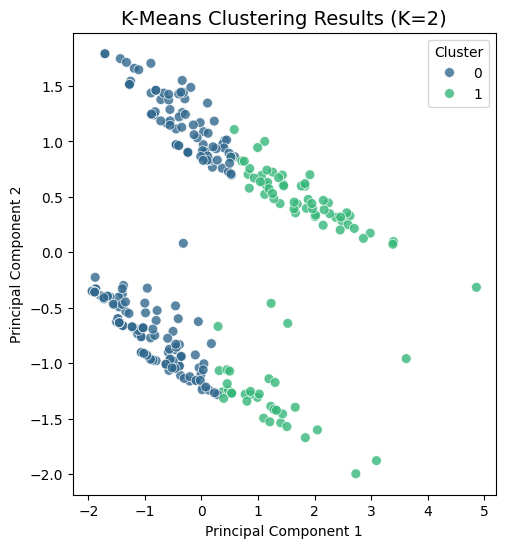

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=50, alpha=0.8)
plt.title('K-Means Clustering Results (K=2)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

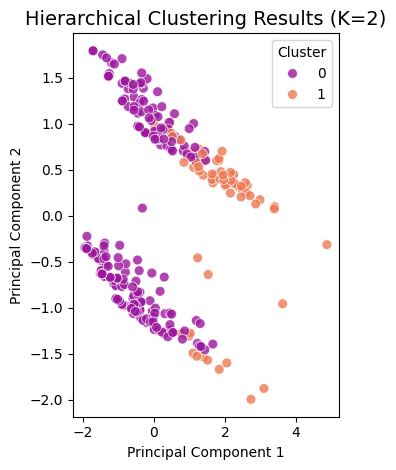

In [15]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg_labels, palette='plasma', s=50, alpha=0.8)
plt.title('Hierarchical Clustering Results (K=2)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [17]:
print("\n--- Comparing Cluster Labels with True Labels ---")

# K-Means vs. True Labels
kmeans_crosstab = pd.crosstab(y_true, kmeans_labels, rownames=['True Label'], colnames=['K-Means Cluster'])
print("\nCross-tabulation for K-Means:")
print(kmeans_crosstab)
# Hierarchical vs. True Labels
agg_crosstab = pd.crosstab(y_true, agg_labels, rownames=['True Label'], colnames=['Hierarchical Cluster'])
print("\nCross-tabulation for Hierarchical Clustering:")
print(agg_crosstab)


--- Comparing Cluster Labels with True Labels ---

Cross-tabulation for K-Means:
K-Means Cluster    0   1
True Label              
0                155   9
1                 54  85

Cross-tabulation for Hierarchical Clustering:
Hierarchical Cluster    0   1
True Label                   
0                     157   7
1                      84  55
